2
3
원 데이터 ADF Statistic: -1.406
원 데이터 p-value: 0.580


C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsup

C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided an

       order          AIC
3   p0 d1 q0 -3730.441984
4   p0 d1 q1 -3728.665742
12  p1 d1 q0 -3728.659731
13  p1 d1 q1 -3727.241554
5   p0 d1 q2 -3726.849460
21  p2 d1 q0 -3726.839304
22  p2 d1 q1 -3725.243790
14  p1 d1 q2 -3725.243788
23  p2 d1 q2 -3723.242900
7   p0 d2 q1 -3720.087089
8   p0 d2 q2 -3718.690474
19  p2 d0 q1 -3718.646155
16  p1 d2 q1 -3718.451398
25  p2 d2 q1 -3717.207607
17  p1 d2 q2 -3716.121438
26  p2 d2 q2 -3714.645567
9   p1 d0 q0 -3702.533132
20  p2 d0 q2 -3701.377662
18  p2 d0 q0 -3700.575989
10  p1 d0 q1 -3700.575317
11  p1 d0 q2 -3698.636257
24  p2 d2 q0 -3423.034595
15  p1 d2 q0 -3305.169723
6   p0 d2 q0 -3019.319966
2   p0 d0 q2  1570.088428
1   p0 d0 q1  2799.476189
0   p0 d0 q0  4141.732684
                              ARIMA Model Results                              
Dep. Variable:     D.block_rq_complete   No. Observations:                  999
Model:                  ARIMA(2, 1, 2)   Log Likelihood                1867.621
Method:                        c

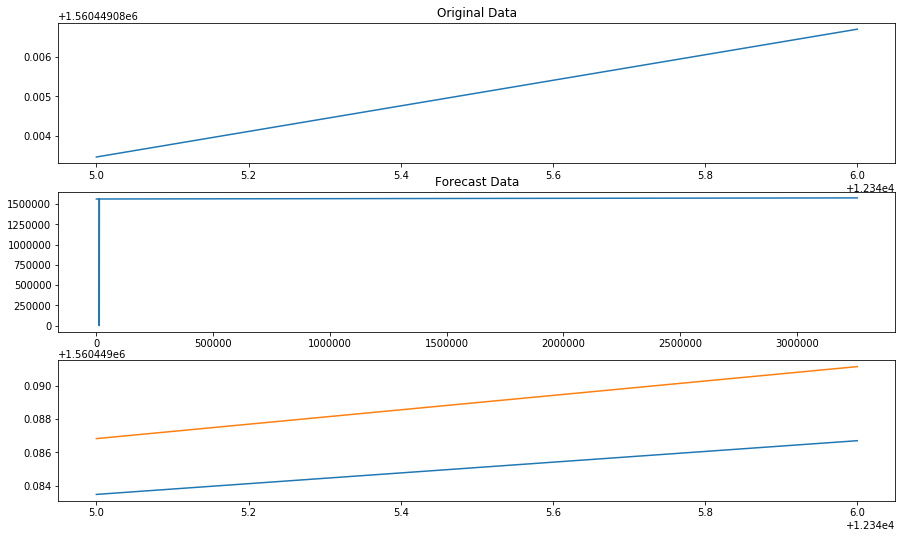

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import nan
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import time

def main():
    data = pd.read_csv("C:/Users/jsm97/Desktop/raw193.csv")
    data1 = data.copy()
    data1 = data1['block_rq_complete']
    data = data['block_rq_complete']
    data = data[data!=0]
    data[12345] = 0
    data[12346] = 0
    #data[456] = 0
    #print(data)
    
    zero_data = data[data==0]
    zero_data = zero_data.reset_index()
    zero_data['index_Difference'] = zero_data['index']
    zero_data['index_Difference'] = zero_data['index_Difference'] - zero_data['index_Difference'].shift(1,fill_value=0)
    zero_temp = zero_data[zero_data['index_Difference']>1]
    zero_temp = zero_temp.reset_index()
    
    zero_temp['level_0'] = zero_temp['level_0'].shift(-1) - zero_temp['level_0']
    nan_value = zero_data.iloc[-1]['index'] - zero_temp.iloc[-1]['index'] + 1
    zero_temp = zero_temp.replace(nan,nan_value)
    zero_temp['level_0'] = zero_temp['level_0']
    #print(zero_temp)
    #print(len(zero_temp))
    
    len_pred = 100
    len_train = 1000
    for i in range(len(zero_temp)):
        test = zero_temp.iloc[i]['level_0'].astype('int64')
        train = zero_temp.iloc[i]['index'].astype('int64')
        print(test)
        if test > 100:
            while test > 100:
                if train < 1000:
                    data_temp = data[train-train:trina]
                    print("4")
                data_temp = data[train-1000:train]
                test = test - 100
                train = train + 100
                print("1")

        else:
            if train < 1000:
                data_temp = data[train - train:train]
                print("2")
            else:
                data_temp = data[train - 1000:train]
                print("3")
    
    #print(zero_temp)
    #print(zero_data)

    #total=len(data)
    #print(total)
    #data_temp=data[total-1100:total-100]

    # P-value Check
    #start = time.time()
    result = adfuller(data_temp)
    print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'원 데이터 p-value: {result[1]:.3f}')
    #data_temp = data_temp.diff().dropna()
    #reslut = adfuller(data_temp)
    #print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
    #print(f'1차 차분 p-value: {result[1]:.3f}')

    #print("time : ",time.time()-start)
    
    # ARIMA Parameter Select
    list_arima = my_auto_arima(data_temp, [3,3,3])
    print(list_arima)

    # ARIMA Model
    model = ARIMA(data_temp, order=(2,1,2))
    model_fit = model.fit()
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=test)[0]
    #forecast = model_fit.predict(start= 0,end = 500)
    forecast = pd.DataFrame(forecast)
    forecast.index=range(train,train+test)
    print("forecast")
    print(forecast)
    test_data = data1[train:train+test]
    print("Original")
    print(test_data)

    # plot
    plt.figure(figsize=(15,15))
    plt.subplot(5,1,1)
    plt.title("Original Data")
    plt.plot(test_data)
    plt.subplot(5,1,2)
    plt.title("Forecast Data")
    plt.plot(data)
    plt.subplot(5,1,3)
    plt.plot(test_data)
    plt.plot(forecast)
    

    # mae
    forecast = np.array(forecast).reshape(-1,1)
    test_data = np.array(test_data).reshape(-1,1)
    error_mean = np.mean(np.abs(test_data - forecast), axis=0)
    print("mae : ",error_mean)


def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df
main()
